In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = load_iris()

features = data["data"]
labels = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=.2
)

In [3]:
model = DecisionTreeClassifier()

In [4]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
predictions = model.predict(X_test)
print("Acc: ",accuracy_score(y_test, predictions))

Acc:  0.9


In [6]:
model_md1 = DecisionTreeClassifier(max_depth=1)
model_md5 = DecisionTreeClassifier(max_depth=5)
model_md10 = DecisionTreeClassifier(max_depth=10)

In [7]:
cv_1 = cross_validate(model_md1, features, labels, cv=5)
cv_5 = cross_validate(model_md5, features, labels, cv=5)
cv_10 = cross_validate(model_md10, features, labels, cv=5)

In [8]:
print("test_score_md1: ",cv_1['test_score'])
print("test_score_md5: ",cv_5['test_score'])
print("test_score_md10: ",cv_10['test_score'])

test_score_md1:  [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
test_score_md5:  [0.96666667 0.96666667 0.9        1.         1.        ]
test_score_md10:  [0.96666667 0.96666667 0.9        0.96666667 1.        ]


### From this test, it seems md5 is slightly better

In [9]:
model_md5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
predictions_md5 = model_md5.predict(X_test)

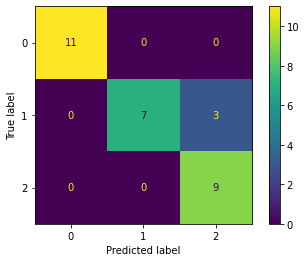

In [11]:
cm = confusion_matrix(y_test, predictions_md5, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['0', '1', '2'])
disp.plot()

### Class label '2' has the most false positives.  Indicatring that 3 instances were marked as class label '2' when they were class label '1' in reality.